# 譜分群(Spectral Clustering)

##### 先引入我們需要的packages

In [1]:
import os 
import numpy as np
import matplotlib.pyplot as plt
from numpy import random
from tqdm.notebook import tqdm
from scipy.spatial.distance import cdist

# MNIST Dataset

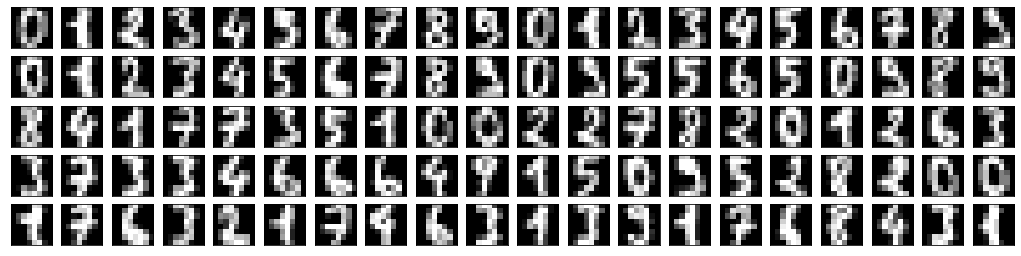

In [2]:
from sklearn.datasets import load_digits
digits = load_digits()
X=digits.data/16
y=digits.target
plt.rcParams["figure.figsize"] = (18,18)
plt.gray() 
for i in range(100):
    plt.subplot(20, 20, i + 1)
    plt.imshow(digits.images[i], cmap=plt.cm.gray, vmax=16, interpolation='nearest')
    plt.xticks(())
    plt.yticks(())
plt.show() 

# # Principal Component Anlysis

In [3]:
def PCA(X,n_components,N):
    X_center=X-np.mean(X,axis=0)
    W,D,V=np.linalg.svd(X_center.T)
    X_embedded=np.dot(X_center,W[:,:n_components])
    return X_embedded

# Similarity Metrix

In [4]:
dist = cdist(X,X,"euclidean")
n_neigh=10
S=np.zeros(dist.shape)
neigh_index=np.argsort(dist,axis=1)[:,1:n_neigh+1]
sigma=1
for i in range(X.shape[0]):
    S[i,neigh_index[i]]=np.exp(-dist[i,neigh_index[i]]/(2*sigma**2))
S=np.maximum(S,S.T)
k=10

# Unnormalized Spectral Clustering

In [5]:
D=np.diag(np.sum(S,axis=1))
L=D-S
A,B=np.linalg.eig(L)
idx=np.argsort(A)[:k]
U=B[:,idx]
N,M=U.shape
init_index=np.zeros(k)
for i in range(k):
    index=np.random.randint(0,N,1)
    while(y[index]!=i):
        index=np.random.randint(0,N,1)
    init_index[i]=index
init_index=init_index.astype(int)
k_mean=U[init_index]
max_iter=100
for t in range(max_iter):
    dist=cdist(U,k_mean,metric='euclidean')
    cluster_index1=np.argmin(dist,axis=1)
    for i in range(k):
        BOOL=(cluster_index1==i)
        k_mean[i]=np.mean(U[BOOL],axis=0)

# Normalized spectral clustering according to Shi and Malik

In [6]:
L_rw=np.dot(np.linalg.inv(D),L)
A,B=np.linalg.eig(L_rw)
idx=np.argsort(A)[:k]
U=B[:,idx]
N,M=U.shape
init_index=np.zeros(k)
for i in range(k):
    index=np.random.randint(0,N,1)
    while(y[index]!=i):
        index=np.random.randint(0,N,1)
    init_index[i]=index
init_index=init_index.astype(int)
k_mean=U[init_index]
max_iter=100
for t in range(max_iter):
    dist=cdist(U,k_mean,metric='euclidean')
    cluster_index2=np.argmin(dist,axis=1)
    for i in range(k):
        BOOL=(cluster_index2==i)
        k_mean[i]=np.mean(U[BOOL],axis=0)

# Normalized spectral clustering according to Ng, Jordan, and Weiss

In [7]:
D_tmp=np.linalg.inv(D)**(1/2)
L_sym=np.dot(np.dot(D_tmp,L),D_tmp)
A,B=np.linalg.eig(L_sym)
idx=np.argsort(A)[:k]
U=B[:,idx]
U=U/((np.sum(U**2,axis=1)**0.5)[:,None])
N,M=U.shape
init_index=np.zeros(k)
for i in range(k):
    index=np.random.randint(0,N,1)
    while(y[index]!=i):
        index=np.random.randint(0,N,1)
    init_index[i]=index
init_index=init_index.astype(int)
k_mean=U[init_index]
max_iter=100
for t in range(max_iter):
    dist=cdist(U,k_mean,metric='euclidean')
    cluster_index3=np.argmin(dist,axis=1)
    for i in range(k):
        BOOL=(cluster_index3==i)
        k_mean[i]=np.mean(U[BOOL],axis=0)

# Result

the spectrual clustering (L) error rate:  0.17084028937117413
the spectrual clustering (L_rw) error rate:  0.19198664440734559
the spectrual clustering (L_sym) error rate:  0.11074012242626596


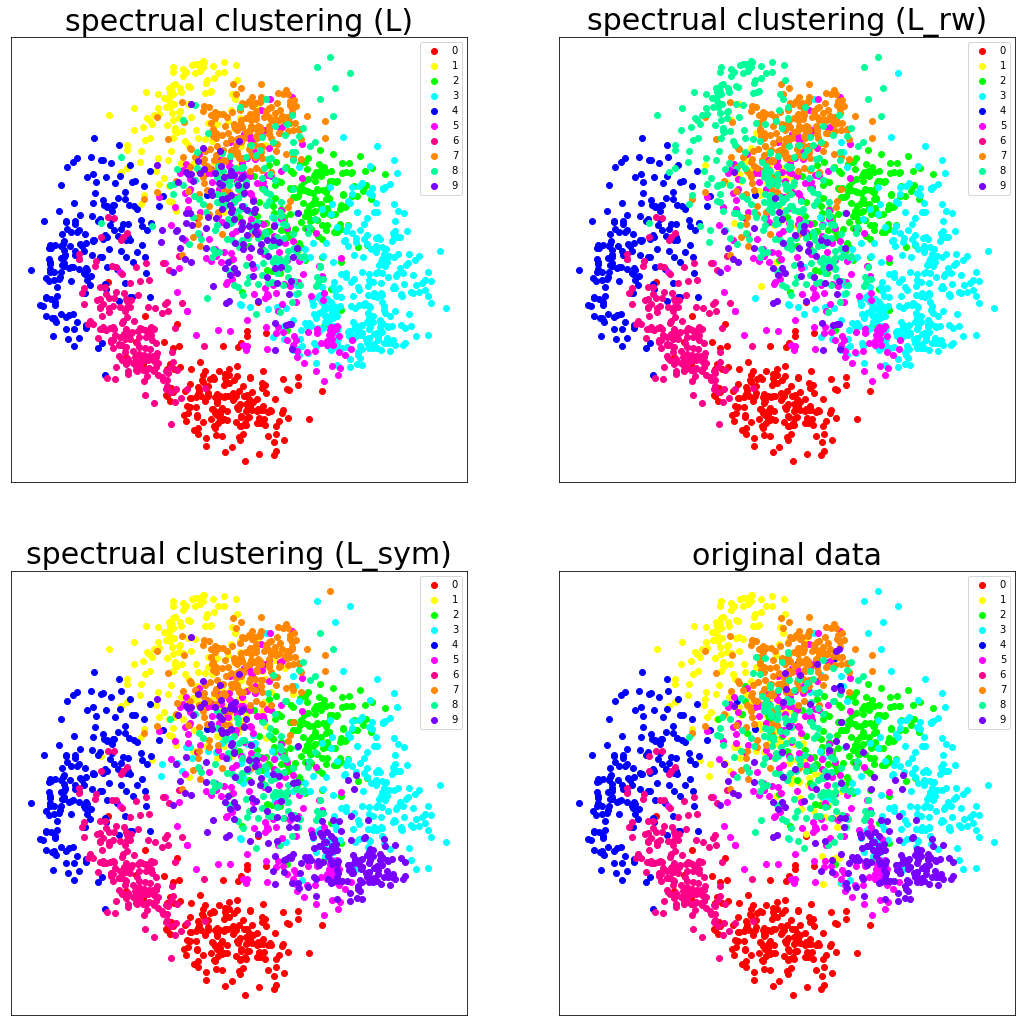

In [8]:
print("the spectrual clustering (L) error rate: ",1-np.sum(y==cluster_index1)/N)
print("the spectrual clustering (L_rw) error rate: ",1-np.sum(y==cluster_index2)/N)
print("the spectrual clustering (L_sym) error rate: ",1-np.sum(y==cluster_index3)/N)
X_embedded=PCA(X,2,N)
color=["#FF0000","#FFFF00","#00FF00","#00FFFF","#0000FF",
       "#FF00FF","#FF0088","#FF8800","#00FF99","#7700FF"]
plt.rcParams["figure.figsize"] = (18,18)
fig , ax = plt.subplots()
plt.subplot(2, 2, 1)
for i in range(0,10):
    BOOL=(cluster_index1==i)
    plt.scatter(X_embedded[BOOL,0],X_embedded[BOOL,1],c=color[i],label=i)
plt.title("spectrual clustering (L)",fontsize=30)
plt.xticks([])
plt.yticks([])
plt.legend(fontsize=10)
plt.subplot(2, 2, 2)
for i in range(0,10):
    BOOL=(cluster_index2==i)
    plt.scatter(X_embedded[BOOL,0],X_embedded[BOOL,1],c=color[i],label=i)
plt.title("spectrual clustering (L_rw)",fontsize=30)
plt.xticks([])
plt.yticks([])
plt.legend(fontsize=10)
plt.subplot(2, 2, 3)
for i in range(0,10):
    BOOL=(cluster_index3==i)
    plt.scatter(X_embedded[BOOL,0],X_embedded[BOOL,1],c=color[i],label=i)
plt.title("spectrual clustering (L_sym)",fontsize=30)
plt.xticks([])
plt.yticks([])
plt.legend(fontsize=10)
plt.subplot(2, 2, 4)
for i in range(0,10):
    BOOL=(y==i)
    plt.scatter(X_embedded[BOOL,0],X_embedded[BOOL,1],c=color[i],label=i)
plt.title("original data",fontsize=30)
plt.xticks([])
plt.yticks([])
plt.legend(fontsize=10)
plt.show()